# Loan Data from Prosper
## by Pouyan Ebrahimi

## Investigation Overview

> The overall goals of my project:
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

> This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

## Distribution Plots of Borrower Rate, Loan Original Amount, and Prosper Score 

> Borrower Rate has a uninomial-normal distribution from 0 uto 0.4 on a standard scale. However Loan Original Amount has a Binomial distribution on a log scale and takes on a very large range of values, from about 1k at the lowest, to about 3.6k at the highest. It is also interesting to know that most of people has a Prosper Score between 4 and 8. 

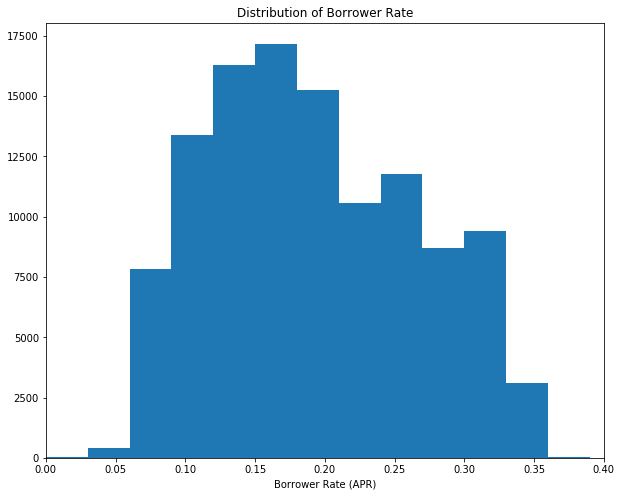

In [32]:
binsize = 0.03
bins = np.arange(0, loans['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data=loans,x="BorrowerRate", bins = bins)
plt.xlim([0.0,0.4])
plt.title("Distribution of Borrower Rate")
plt.xlabel('Borrower Rate (APR)')
plt.show()

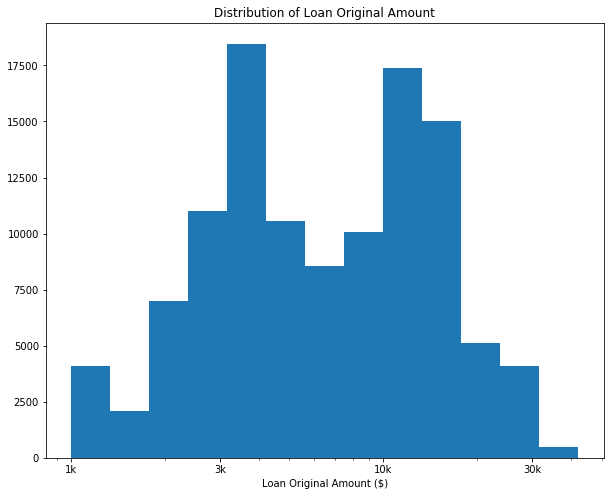

In [33]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
# To find the min and max use:
# np.log10(loans['LoanOriginalAmount'].describe())
bins = 10 ** np.arange(3.0, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
# min is: 3.000000 and max is: 4.544068. 
# so ticks could be calculated by min= 10**3.000000=1000 and max= 10**4.5=30000
ticks=[1000, 3000, 10000, 30000]
#labels= ["{}".format(v) for v in ticks]
labels=["1k", "3k", "10k","30k"]
plt.figure(figsize=[10, 8])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Loan Original Amount ($)')
plt.title("Distribution of Loan Original Amount")
plt.show()

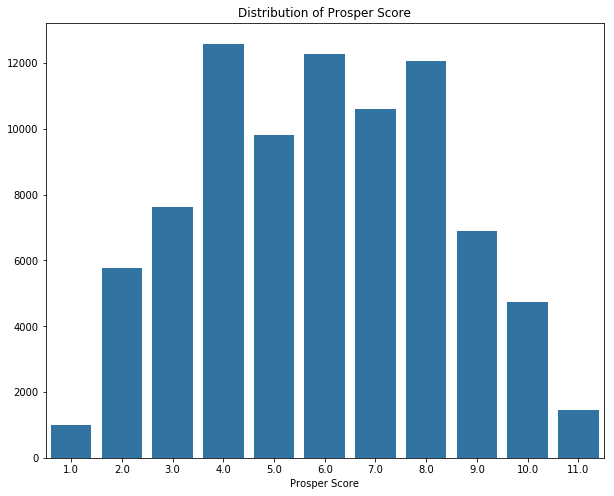

In [34]:
# plotting Loan ProsperScore Amount on a standard scale
# The score ranges from 1-10, with 10 being the best, or lowest risk score.
# (worst) ——> 1,2,3,4,5,6,7,8,9,10,11
# ProsperScore: 1. 

# first the ProsperScore type should be changed to categorical! 
loans_ProsperScore_noNaN=loans.copy()
loans_ProsperScore_noNaN=loans_ProsperScore_noNaN[~loans_ProsperScore_noNaN['ProsperScore'].isnull()]

ordinal_var_dict={"ProsperScore":[1,2,3,4,5,6,7,8,9,10,11,12,13]}
for var in ordinal_var_dict:
    pd_ver=pd.__version__.split(".")
    if (int(pd_ver[0])>0) or (int(pd_ver[1])>=21): #v0.21 or later
        ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
        loans_ProsperScore_noNaN[var]=loans_ProsperScore_noNaN[var].astype("category")
    else: # pre_v0.21
        loans_ProsperScore_noNaN[var]=loans_ProsperScore_noNaN.astype("category", 
                                                                     ordered=True,categories=ordinal_var_dict[var])
#plotting
plt.figure(figsize=[10, 8])
base_color=sb.color_palette()[0]
sb.countplot(data = loans_ProsperScore_noNaN, x = 'ProsperScore',color=base_color)
plt.xlabel('Prosper Score')
plt.ylabel('')
plt.title("Distribution of Prosper Score")
plt.show()

## Distribution of Prosper Score in different Employment Status and Income Ranges

> Plot 1: the emplyed people are the most populated loan borrowers no matter what is their Prosper Score. If their Prosper Score is between 4 and 8, the the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000.

>Plot 2: In ProsperScore of 2 to 10, the number of loaners who has a salary of 25-49k and 50-74k is more than others and if the Prosper Score is between 4 and 8, the popluation of both salries of 25-49k and 50-74k ranges are above 2500.

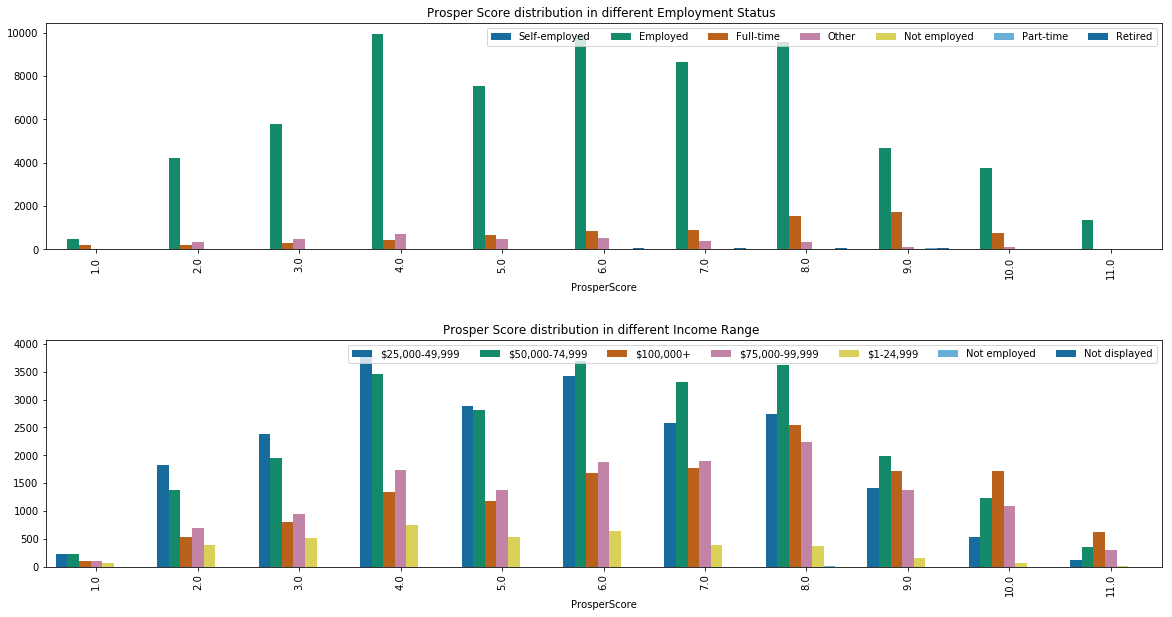

In [35]:
numeric_vars = ['BorrowerRate', 'CurrentCreditLines', 'TotalCreditLinespast7years', 
                'OpenCreditLines', 'DebtToIncomeRatio', 
                'Recommendations','LoanOriginalAmount','EmploymentStatusDuration']
loans_noNAN=loans.copy()
loans_noNAN=loans_noNAN.dropna(subset=numeric_vars)

#Plot
plt.figure(figsize = [20, 10])
Rotation=90
ncolno=10
# subplot 1:
ax1  = plt.subplot(2, 1, 1)
sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'colorblind')
ax1.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xlabel('ProsperScore')
plt.ylabel('')
plt.title("Prosper Score distribution in different Employment Status ")
plt.xticks(rotation=Rotation)

# subplot 2:
ax2= plt.subplot(2, 1, 2)
sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'IncomeRange', palette = 'colorblind')
ax2.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xlabel('ProsperScore')
plt.ylabel('')
plt.title("Prosper Score distribution in different Income Range ")
plt.xticks(rotation=Rotation);

plt.subplots_adjust(hspace=0.4)

## Loan Original Amount vs. Borrower Rate

>The graph shows that by increasing Loan Original Amount, Borrower Rate decreases.

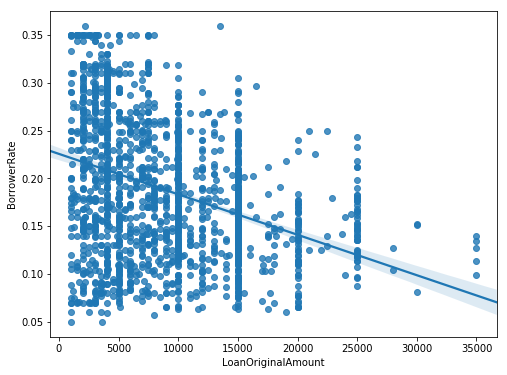

In [36]:
# scatter plot of BorrowerRate (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(loans_noNAN.shape[0],2000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_noNAN_subset, x = 'LoanOriginalAmount', y= 'BorrowerRate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.show()

## BorrowerRate at Different Income Ranges

>The plot of the full data using a violin plot suggests that changing income range does not affect the borrow rate and the mean of all borrow rates in different income ranges is ~0.15-0.21

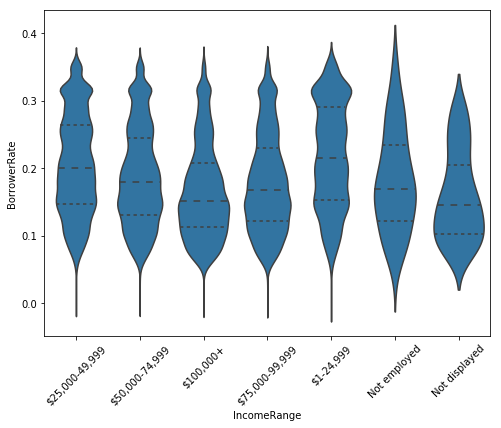

In [37]:
# violin plot of BorrowerRate (numeric) vs. IncomeRange (categoric_vars)
plt.figure(figsize = [8, 6])
base_color=sb.color_palette()[0]
sb.violinplot(data = loans_noNAN, x = 'IncomeRange', y= 'BorrowerRate',color=base_color, inner="quartile");
plt.xticks(rotation=45);

## Effect of Total Credit Lines-past7 years on Loan Original Amount and Borrower Rate Relationship

> "Total Credit Linespast of 7years" does not play a significant role on controling the Borrower Rate and Loan Original Amount relationship.

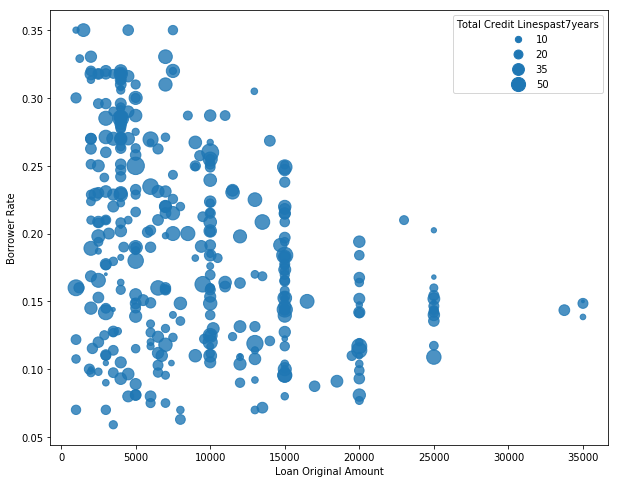

In [38]:
#np.random.seed(2018)
sample=np.random.choice(loans_noNAN.shape[0],500, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]

plt.figure(figsize = [10,8])
#plt.subplot(2,1,1)
ax1=sb.regplot(data=loans_noNAN_subset,x="LoanOriginalAmount",y="BorrowerRate",
          x_jitter=0.04, fit_reg=False,
          scatter_kws={'s':loans_noNAN_subset["TotalCreditLinespast7years"]*4})
plt.xlabel("Loan Original Amount")
plt.ylabel("Borrower Rate")
sizes=[10, 20, 35,50]
base_color=sb.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s*4,color=base_color))
plt.legend(legend_obj,sizes,title="Total Credit Linespast7years");


## Effect of Income Range on Loan Original Amount and Borrower Rate Relationship

>It seems by increasing the Loan Original Amount, both Borrower Rate and Income Range decrease. Besides, apparently only those who has a Income Range above \$100k, are borrowing higher Loan Original Amount (>$25000) and their Borrower Rate is <0.15.

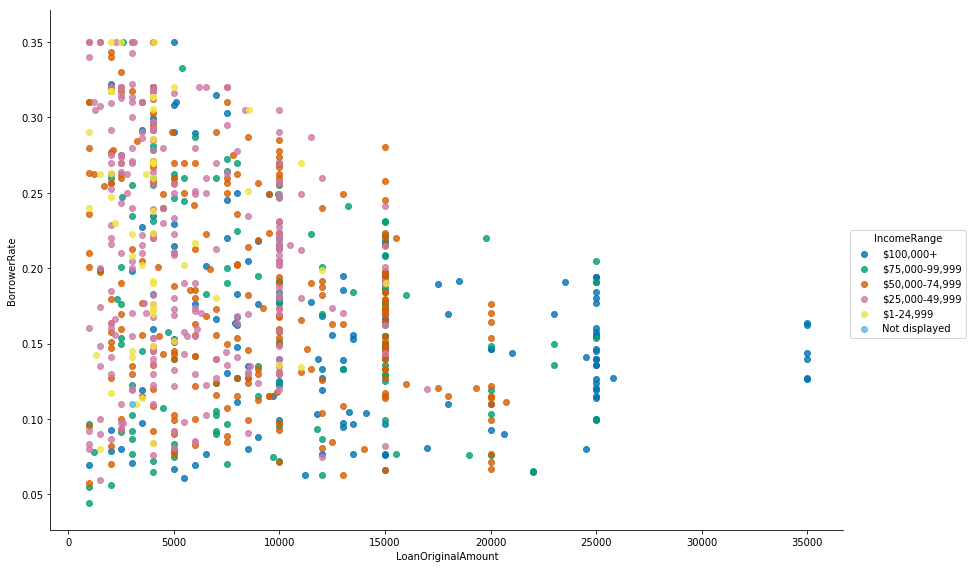

In [39]:
#np.random.seed(18)
sample=np.random.choice(loans_noNAN.shape[0],1000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=loans_noNAN_subset,hue="IncomeRange",hue_order=IncomeRange_order,
               size=8, aspect=1.5,palette="colorblind")
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

## Effect of Income Range on Prosper Score and Borrower Rate Relationship

> In general, increasing ProsperScore decreases BorrowerRate. Apperntly, people with lower IncomeRange have higher Borrower Rate at each individual Prosper Score.

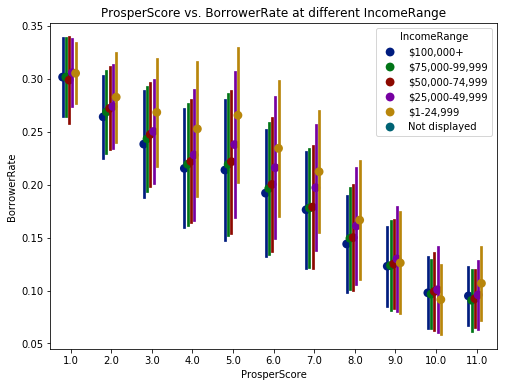

In [40]:
fig = plt.figure(figsize = [8,6])
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
ax = sb.pointplot(data = loans_noNAN, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();